<a href="https://colab.research.google.com/github/FarshadAmiri/Algorithmic_programming/blob/main/Algorithms_ComplexityAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import time 
import matplotlib.pyplot as plt
sys.setrecursionlimit(10**6)

In [81]:
@title DECLARING compute_time_complexity FUNCTION
def compute_time_complexity(fn,input_growth_term='n', saving_input = 'real',input_range=(1,512), n_iterations= 200):
  time_dict = {}
  if len(input_range) == 2:
    input_range = range(input_range[0], input_range[1])
  elif len(input_range) == 3:
    input_range = range(input_range[0], input_range[1], input_range[2])
  
  if input_growth_term == 'n':
    for i in  input_range:
      t1 = time.time()
      for j in range(n_iterations):
        fn(i)
      t = (time.time() - t1)/n_iterations
      time_dict[i] = t
  
  if input_growth_term == '2**n':
    for i in  input_range:
      t1 = time.time()
      for j in range(n_iterations):
        fn(2**i)
      t = (time.time() - t1)/n_iterations
      if saving_input == 'real':
        time_dict[int(2**i)] = t
      elif saving_input == 'power':
        time_dict[i] = t
  
  x, y = zip(*sorted(time_dict.items()))
  return x, y

### Time complexity of T(n) = c

In [63]:
def f_c(n):
  result = 0
  return result 

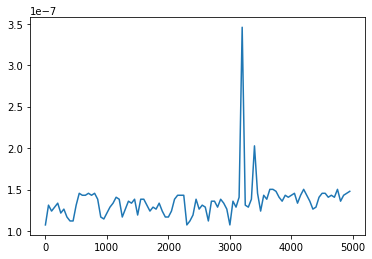

In [98]:
x, y = compute_time_complexity(f_c, 'n','input_power', (1,5000,50), 200000)
plt.plot(x[:3000],y[:3000])

As it is obvious, operation time is not increasing or decreasing as input value grows. Actually here the function doesn't do anything with the input at all! 

### Comparing time complexity of
# T(n) = T(n/2) + 1
# T(n) = T(n/4) + 1
# T(n) = T(n/8) + 1

In [69]:
def f_2(n):
  if n == 1:
    return 1
  return f_2(n/2) + 1

In [70]:
def f_4(n):
  if n == 1:
    return 1
  return f_4(n/4) + 1

In [71]:
def f_8(n):
  if n == 1:
    return 1
  return f_8(n/8) + 1

In [86]:
x_f_2, y_f_2 = compute_time_complexity(f_2, '2**n','real', (1,512), 500)

In [87]:
x_f_4, y_f_4 = compute_time_complexity(f_4, '2**n','real', (2,512,2), 500)

In [88]:
x_f_8, y_f_8 = compute_time_complexity(f_8, '2**n','real', (3,512,3), 500)

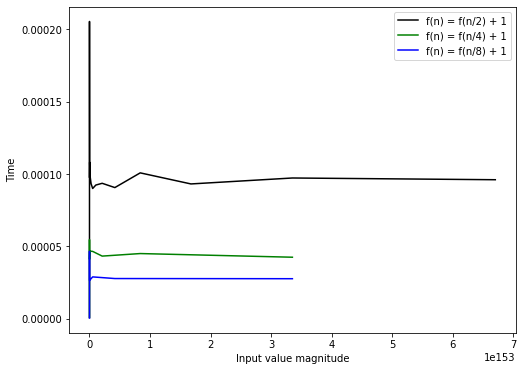

In [94]:
start = int(1e0)
end = int(1e4)

plt.figure(figsize=(8,6))
plt.xlabel('Input value magnitude')
plt.ylabel('Time')
plt.plot(x_f_2[start:end], y_f_2[start:end], color='k', label='f(n) = f(n/2) + 1')
plt.plot(x_f_4[start:end], y_f_4[start:end], color = 'g', label='f(n) = f(n/4) + 1')
plt.plot(x_f_8[start:end], y_f_8[start:end], color = 'b', label='f(n) = f(n/8) + 1')
plt.legend()

*   T(n) = T(n/2) + 1  --> O(log n) - log base = 2
*   T(n) = T(n/4) + 1  --> O(log n) - log base = 4
*   T(n) = T(n/8) + 1  --> O(log n) - log base = 8